In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [2]:
X = iris["data"][:, 3:] #only retrieve the column 3 in the 2D matrix (which has 4 features, so we only retrieve petal width)
y = (iris["target"] == 2).astype(np.int) # if y == 0, not Iris-Virginica, if y == 1, is Iris-Virginica

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
#generate 1000 artificial samples of flowers varying from 0 to 3 cm, evenly spaced. Used to graph the distrib. of log_reg
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba # column 0: probability it is not Iris-Virginica, column 1: probability it is Iris-Virginica

array([[0.98552764, 0.01447236],
       [0.98541511, 0.01458489],
       [0.98530171, 0.01469829],
       ...,
       [0.02620686, 0.97379314],
       [0.02600703, 0.97399297],
       [0.02580868, 0.97419132]])

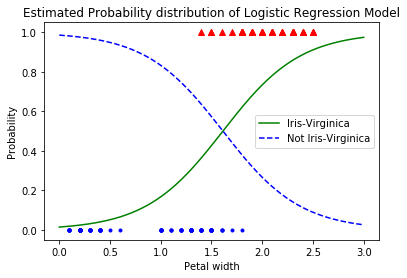

In [6]:
import matplotlib.pyplot as plt 

# select column 1 over all instances as probability it is Iris-Virginica
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica") 
# select column 0 over all instances as probability it is not Iris-Virginica
plt.plot(X_new, y_proba[:, 0 ], "b--", label="Not Iris-Virginica")
plt.title("Estimated Probability distribution of Logistic Regression Model", loc="center")
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.plot(X[y==0], y[y==0], "b.")
plt.plot(X[y==1], y[y==1], "r^")
plt.legend(loc="center right")
plt.show()

In [11]:
X_pred = [[1.7], [1.5], [2.7]]
log_reg.predict(X_pred)
# 1 means it is Iris Virginica, 0 is not Iris-Virginica

array([1, 0, 1])

In [13]:
log_reg.predict_proba(X_pred)
# probabilities show us how certain the model is for its decision.
# The last row's distribution shows it is much more sure about 2.7 than it is about 1.5 and 1.7 

array([[0.4431381 , 0.5568619 ],
       [0.5732246 , 0.4267754 ],
       [0.05490331, 0.94509669]])